In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [53]:
!pip install imbalanced-learn

In [2]:
apps_df = pd.read_csv("data/apps_info.csv")
games_df = pd.read_csv("data/games_info.csv")

In [3]:
print("Apps veri seti:")
display(apps_df.head())

Apps veri seti:


,app_id,app_name,description,score,ratings_count,downloads,content_rating,section,categories
0,1,Western Union Send Money Now,Enjoy a $0 transfer fee* on your next online i...,4.6,317000,10000000,Everyone,Budgeting tools,Finance
1,2,"Priceline: Hotel, Flight & Car",Save on your next trip with exclusive deals on...,4.7,502000,10000000,Everyone,Business tools,Travel & Local
2,3,Slack,Slack brings team communication and collaborat...,3.4,134000,10000000,Everyone,Business tools,Business
3,4,MyWalmart,"Introducing MyWalmart, the one app designed fo...",4.7,211000,1000000,Everyone,Business tools,Business
4,5,Fidelity Investments,Invest at a firm invested in you. Fidelity’s s...,4.6,182000,5000000,Everyone,Business tools,Finance


In [4]:
print("Games veri seti:")
display(games_df.head())

Games veri seti:


,game_id,game_name,description,score,ratings_count,downloads,content_rating,section,categories
0,1,Geometry Dash SubZero,Geometry Dash is back with a brand new adventu...,4.5,926000,100000000,Everyone,Abstract graphics,"Action, Platformer, Runner, Arcade, Single pla..."
1,2,Word Collect - Word Games Fun,Download the best word games Free in Word Coll...,4.7,588000,10000000,Everyone,Abstract graphics,"#10 top grossing word, Word, Search, Single pl..."
2,3,Tap Away,Do you have what it takes to solve all the swi...,4.3,1130000,50000000,Everyone,Abstract graphics,"Puzzle, Logic, Casual, Single player, Abstract..."
3,4,Sudoku - Classic Sudoku Puzzle,Enjoy the Classic Sudoku Puzzle Game for free!...,4.7,2650000,50000000,Everyone,Abstract graphics,"Puzzle, Logic, Sudoku, Casual, Single player, ..."
4,5,Woodber - Classic Number Game,Woodber - perfect combination of classic numbe...,4.6,225000,10000000,Everyone,Abstract graphics,"Puzzle, Logic, Casual, Single player, Abstract..."


# Model: Logistic Regression

In [11]:
scaler = MinMaxScaler()

apps_df[['rating_norm', 'downloads_norm']] = scaler.fit_transform(apps_df[['score', 'downloads']])
games_df[['rating_norm', 'downloads_norm']] = scaler.fit_transform(games_df[['score', 'downloads']])


In [12]:
apps_df['success_score'] = 0.3 * apps_df['rating_norm'] + 0.7 * apps_df['downloads_norm']
games_df['success_score'] = 0.3 * games_df['rating_norm'] + 0.7 * games_df['downloads_norm']

In [13]:
apps_df['success_label'] = apps_df['success_score'].apply(lambda x: 1 if x > 0.6 else 0)
games_df['success_label'] = games_df['success_score'].apply(lambda x: 1 if x > 0.6 else 0)

In [14]:
feature_columns = ['rating_norm', 'downloads_norm']

X_apps = apps_df[feature_columns]
y_apps = apps_df['success_label']

X_games = games_df[feature_columns]
y_games = games_df['success_label']


In [29]:
X_train_apps, X_test_apps, y_train_apps, y_test_apps = train_test_split(
    X_apps, 
    y_apps, 
    test_size=0.2, 
    random_state=42
)


In [30]:
X_train_games, X_test_games, y_train_games, y_test_games = train_test_split(
    X_games, 
    y_games, 
    test_size=0.2, 
    random_state=42
)

In [20]:
logreg_apps = LogisticRegression(random_state=42)
logreg_apps.fit(X_train_apps, y_train_apps)


LogisticRegression(random_state=42)

In [21]:
y_pred_apps = logreg_apps.predict(X_test_apps)

In [22]:
print("Classification Report:\n", classification_report(y_test_apps, y_pred_apps))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.00      0.00      0.00         1

    accuracy                           0.98        44
   macro avg       0.49      0.50      0.49        44
weighted avg       0.96      0.98      0.97        44



/Users/eceus/Desktop/vscode/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eceus/Desktop/vscode/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/eceus/Desktop/vscode/.conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

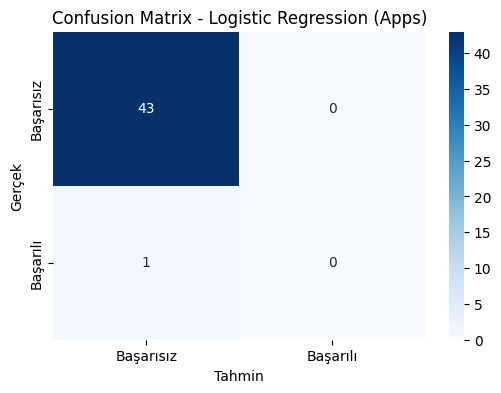

In [23]:
conf_mat = confusion_matrix(y_test_apps, y_pred_apps)

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Başarısız', 'Başarılı'], yticklabels=['Başarısız', 'Başarılı'])
plt.title("Confusion Matrix - Logistic Regression (Apps)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

In [36]:
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train_apps, y_train_apps)

y_pred_balanced = log_reg_balanced.predict(X_test_apps)

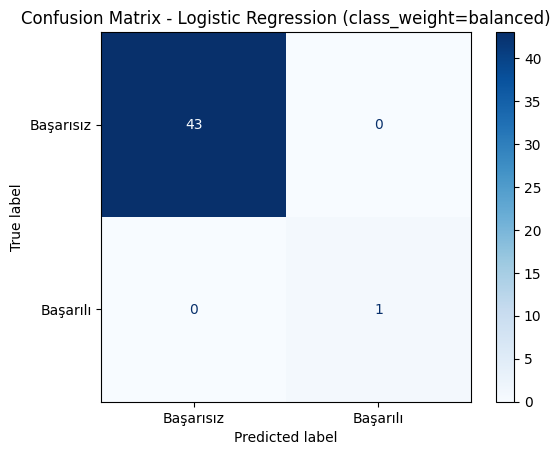

In [37]:
cm = confusion_matrix(y_test_apps, y_pred_balanced)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Başarısız', 'Başarılı'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (class_weight=balanced)")
plt.show()


In [38]:
print(classification_report(y_test_apps, y_pred_balanced))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00         1

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [40]:
y_train_apps.value_counts()

success_label
0    168
1      5
Name: count, dtype: int64

In [62]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_apps_smote, y_train_apps_smote = smote.fit_resample(X_train_apps, y_train_apps)


In [63]:
y_train_apps_smote.value_counts()

success_label
0    168
1    168
Name: count, dtype: int64

In [64]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_apps_smote, y_train_apps_smote)

LogisticRegression(random_state=42)

In [65]:
y_pred = log_reg.predict(X_test_apps)

In [66]:
print(confusion_matrix(y_test_apps, y_pred))
print(classification_report(y_test_apps, y_pred))

[[43  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00         1

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [67]:
X_train_apps, X_test_apps, y_train_apps, y_test_apps = train_test_split(
    X_apps, 
    y_apps, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_apps
)

In [69]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_apps_smote, y_train_apps_smote = smote.fit_resample(X_train_apps, y_train_apps)

In [ ]:
y_train_apps_smote.value_counts()

success_label
0    168
1    168
Name: count, dtype: int64

## Alternatif Model: Random Forest ile Başarı Tahmini

In [74]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_apps_smote, y_train_apps_smote)

RandomForestClassifier(random_state=42)

In [75]:
y_pred_rf = rf_model.predict(X_test_apps)

In [76]:
print(confusion_matrix(y_test_apps, y_pred_rf))
print(classification_report(y_test_apps, y_pred_rf))

[[42  1]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.50      1.00      0.67         1

    accuracy                           0.98        44
   macro avg       0.75      0.99      0.83        44
weighted avg       0.99      0.98      0.98        44



In [77]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_apps.columns)

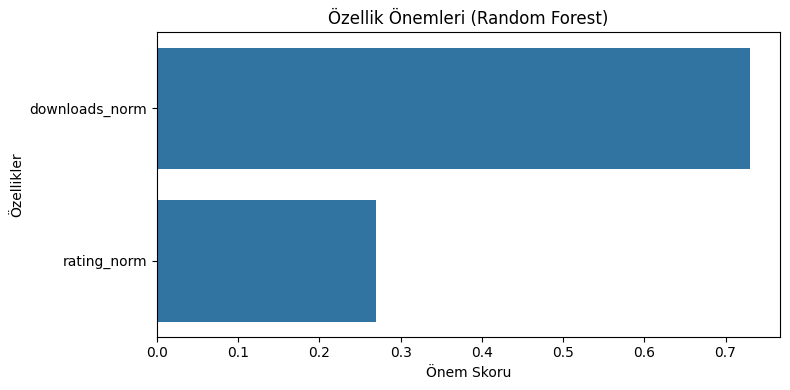

In [78]:
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances.sort_values(ascending=False), y=feature_importances.sort_values(ascending=False).index)
plt.title("Özellik Önemleri (Random Forest)")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()

In [80]:
games_df['success_label'] = (games_df['downloads'] >= 1_000_000).astype(int)

In [82]:
X_games = games_df[['score', 'downloads']]
y_games = games_df['success_label']

scaler = MinMaxScaler()
X_games_scaled = scaler.fit_transform(X_games)


In [83]:
X_train_games, X_test_games, y_train_games, y_test_games = train_test_split(
    X_games_scaled, 
    y_games, test_size=0.2, 
    random_state=42, 
    stratify=y_games
)

In [84]:
smote = SMOTE(random_state=42)
X_train_games_smote, y_train_games_smote = smote.fit_resample(X_train_games, y_train_games)

In [85]:
rf_model_games = RandomForestClassifier(random_state=42)
rf_model_games.fit(X_train_games_smote, y_train_games_smote)

RandomForestClassifier(random_state=42)

In [86]:
y_pred_games = rf_model_games.predict(X_test_games)

In [87]:
print(confusion_matrix(y_test_games, y_pred_games))
print(classification_report(y_test_games, y_pred_games))

[[13  0]
 [ 0 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        54

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



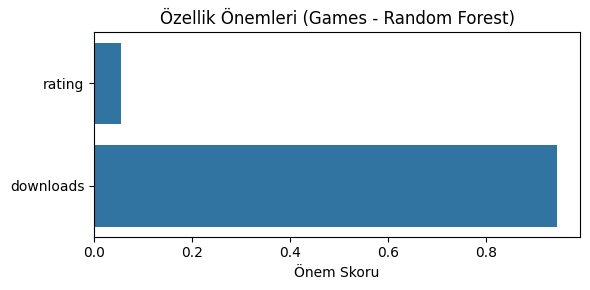

In [88]:
feature_names = ['rating', 'downloads']
importances = rf_model_games.feature_importances_

plt.figure(figsize=(6, 3))
sns.barplot(x=importances, y=feature_names)
plt.title("Özellik Önemleri (Games - Random Forest)")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()